# **Statistički pregled SuperSport HNL u sezoni 2024./2025.**

*Tonći Radovniković*

## Učitavanje potrebnih biblioteka i postavljanje URL-a za web scrapanje stranica HNL-a te upisivanje podataka u CSV datoteke

* Ljestvica
* Rezultati
* Strijelci
* Kartoni
* Gledatelji

In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

# Function to scrape tables using Selenium
def scrape_dynamic_table(url, table_xpath, output_file):
    # Set up Selenium WebDriver
    service = Service(ChromeDriverManager().install())
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # Run in headless mode
    driver = webdriver.Chrome(service=service, options=options)

    try:
        # Open the URL
        driver.get(url)
        time.sleep(5)  # Wait for dynamic content to load

        # Find the table
        table = driver.find_element(By.XPATH, table_xpath)

        # Extract table rows
        rows = table.find_elements(By.TAG_NAME, "tr")
        data = []
        for row in rows:
            cols = row.find_elements(By.TAG_NAME, "td")
            data.append([col.text.strip() for col in cols])

        # Convert to DataFrame
        headers = [header.text.strip() for header in table.find_elements(By.TAG_NAME, "th")]
        df = pd.DataFrame(data[1:], columns=headers)  # Exclude the header row

        # Save to CSV
        df.to_csv(output_file, index=False)
        print(f"Data saved to {output_file}")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        driver.quit()

# URLs and XPaths for tables
pages = {
    "https://hnl.hr/statistika/rezultati/": {"xpath": "//table", "file": "rezultati.csv"},
    "https://hnl.hr/statistika/ljestvica/": {"xpath": "//table", "file": "ljestvica.csv"},
    "https://hnl.hr/statistika/strijelci/": {"xpath": "//table", "file": "strijelci.csv"},
    "https://hnl.hr/statistika/kartoni/": {"xpath": "//table", "file": "kartoni.csv"},
    "https://hnl.hr/statistika/gledatelji/": {"xpath": "//table", "file": "gledatelji.csv"},
}

# Loop through each page and scrape data
for url, info in pages.items():
    scrape_dynamic_table(url, info["xpath"], info["file"])


Error: 36 columns passed, passed data had 8 columns
Data saved to ljestvica.csv
Error: 9 columns passed, passed data had 1 columns
Data saved to kartoni.csv
Data saved to gledatelji.csv


## Statistički prikaz ljestivce klubova

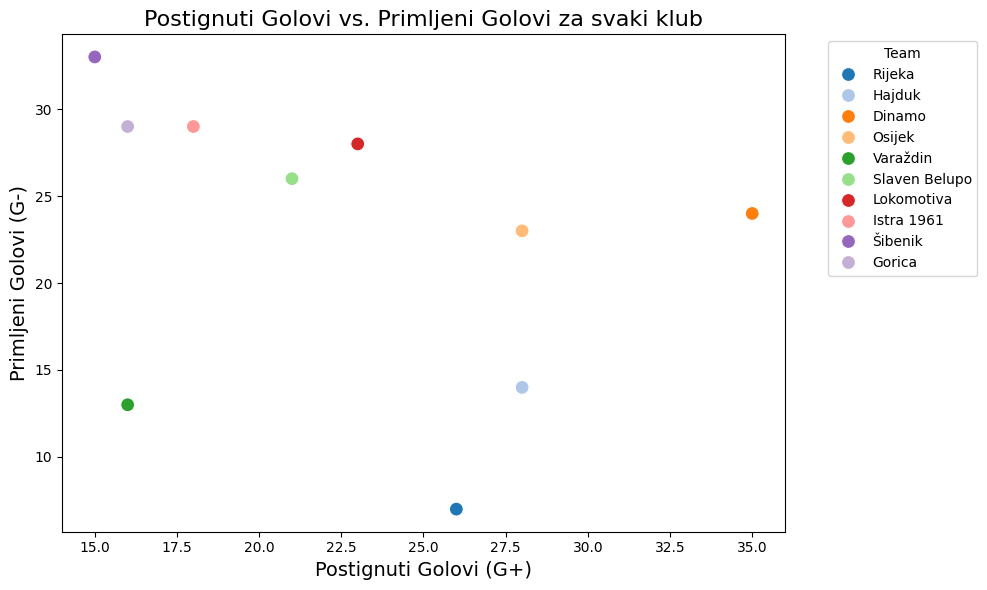

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Ljestvica.csv data
df_ljestvica = pd.read_csv("ljestvica.csv")

# Scatter plot for goals scored vs. goals conceded
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ljestvica, x='G+', y='G-', hue='Klub', palette='tab20', s=100)

# Title and axis labels
plt.title('Postignuti Golovi vs. Primljeni Golovi za svaki klub', fontsize=16)
plt.xlabel('Postignuti Golovi (G+)', fontsize=14)
plt.ylabel('Primljeni Golovi (G-)', fontsize=14)

# Show plot
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


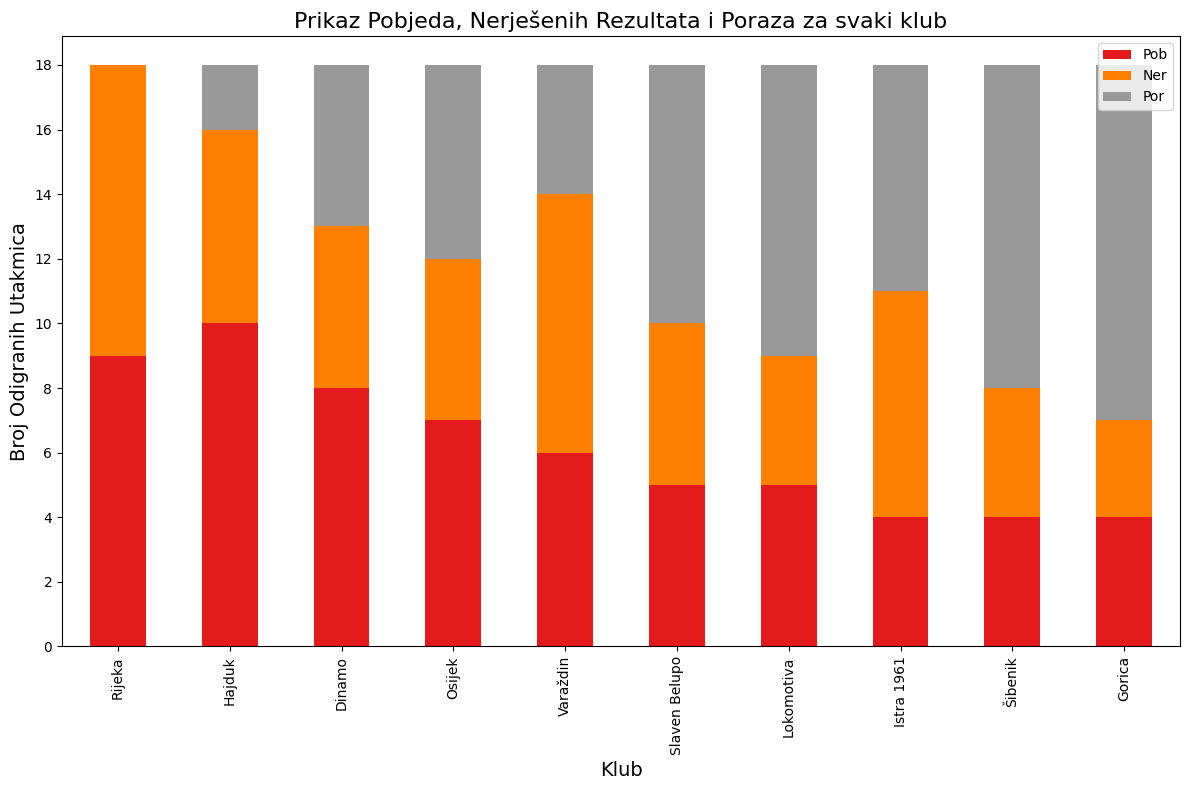

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_ljestvica = pd.read_csv("ljestvica.csv")

# Extract relevant columns: Pob (wins), Ner (draws), Por (losses)
df_team_results = df_ljestvica[['Klub', 'Pob', 'Ner', 'Por']]

# Set the 'Klub' as the index for better readability
df_team_results.set_index('Klub', inplace=True)

# Plot the stacked bar chart
ax = df_team_results.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')

# Title and axis labels
plt.title('Prikaz Pobjeda, Nerješenih Rezultata i Poraza za svaki klub', fontsize=16)
plt.xlabel('Klub', fontsize=14)
plt.ylabel('Broj Odigranih Utakmica', fontsize=14)

# Set y-axis ticks to range from 0 to the maximum count of matches (18 matches per team)
plt.yticks(range(0, 19, 2))

# Show plot
plt.tight_layout()
plt.show()

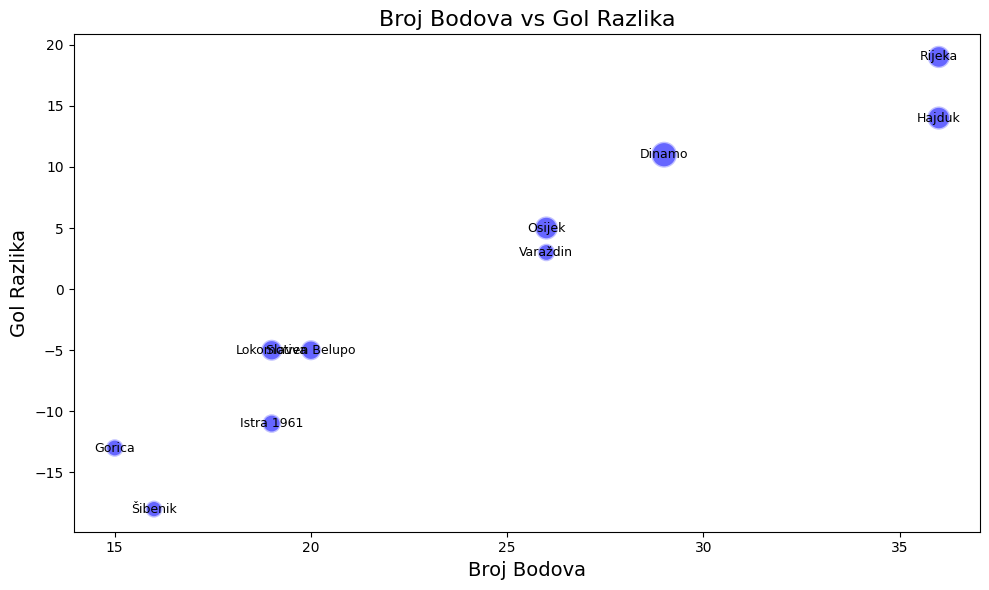

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from ljestvica.csv
df_ljestvica = pd.read_csv("Ljestvica.csv")

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df_ljestvica['Bod'], df_ljestvica['GR'], s=df_ljestvica['G+']*10, alpha=0.6, c='blue', edgecolors="w", linewidth=2)

# Title and axis labels
plt.title('Broj Bodova vs Gol Razlika', fontsize=16)
plt.xlabel('Broj Bodova', fontsize=14)
plt.ylabel('Gol Razlika', fontsize=14)

# Show team names as labels for each bubble
for i in range(df_ljestvica.shape[0]):
    plt.text(df_ljestvica['Bod'][i], df_ljestvica['GR'][i], df_ljestvica['Klub'][i], fontsize=9, ha='center', va='center')

# Show the plot
plt.tight_layout()
plt.show()

## Statistički prikaz rezultata odigranih utakmica

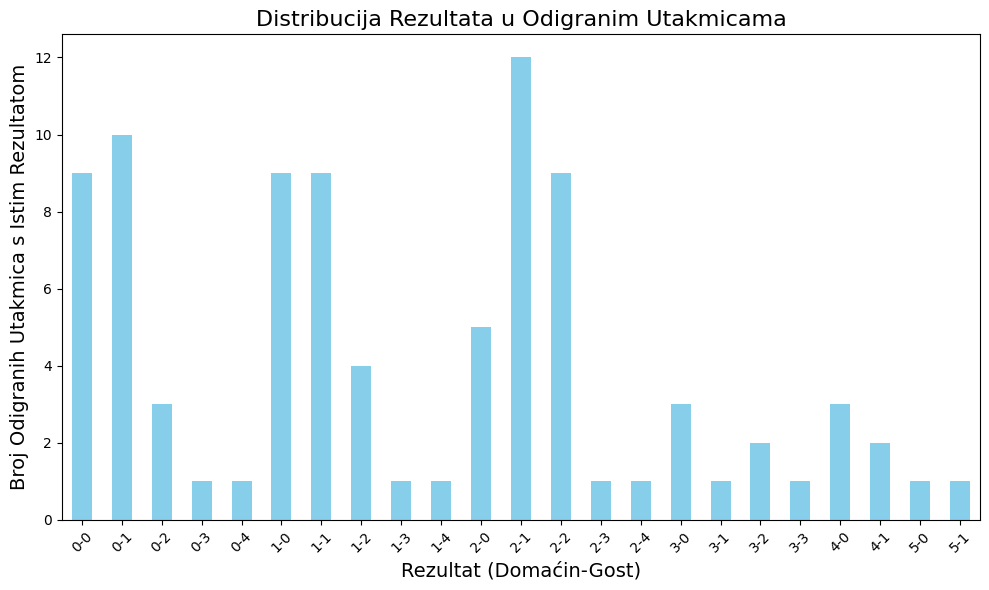

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_rezultati = pd.read_csv("Rezultati.csv")

# Create a 'Score' column representing the match score (home goals - away goals)
df_rezultati['Score'] = df_rezultati['Golovi domaćina'].astype(str) + '-' + df_rezultati['Golovi gosta'].astype(str)

# Plot histogram of score distribution (match scores)
plt.figure(figsize=(10, 6))
df_rezultati['Score'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Title and axis labels
plt.title('Distribucija Rezultata u Odigranim Utakmicama', fontsize=16)
plt.xlabel('Rezultat (Domaćin-Gost)', fontsize=14)
plt.ylabel('Broj Odigranih Utakmica s Istim Rezultatom', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Tonći Radovniković\AppData\Local\Temp\ipykernel_14704\1733153994.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = results_matrix.replace({'W': 3, 'D': 1, 'L': 0})


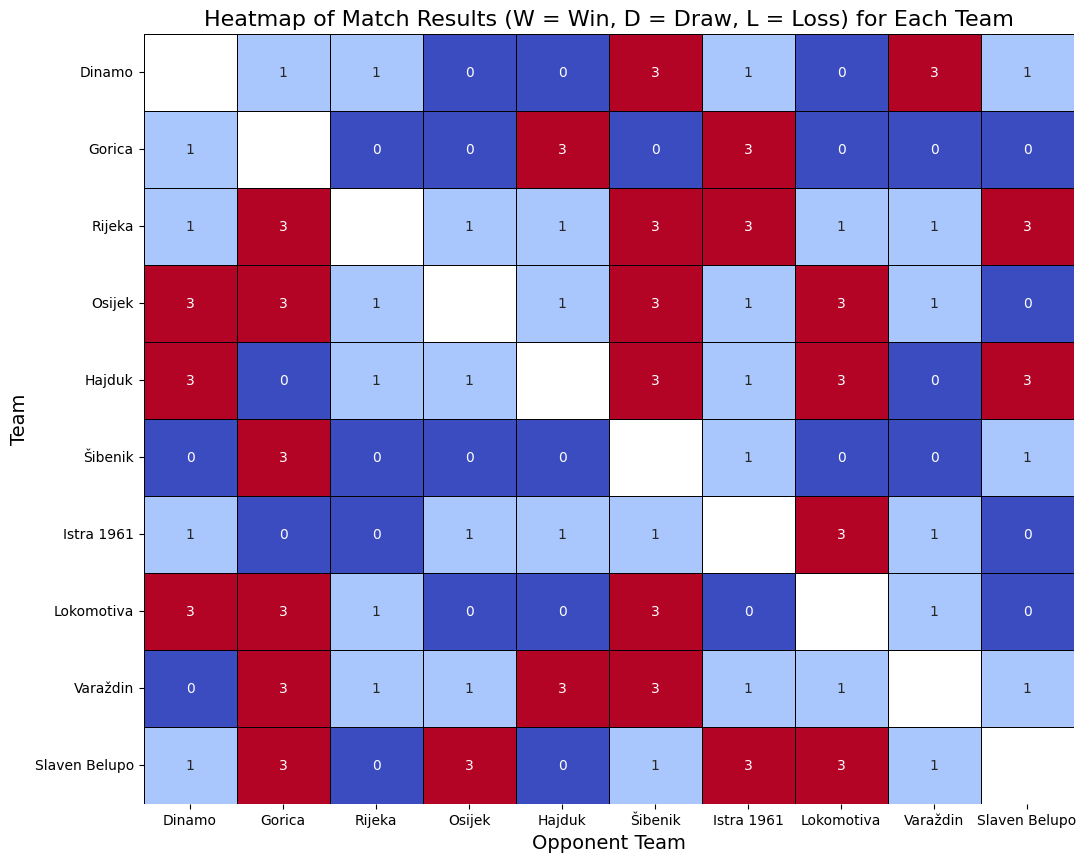

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy to use np.nan

# Load the Rezultati.csv data
df_rezultati = pd.read_csv("rezultati.csv")

# Create a function to categorize the result of the match
def categorize_result(row):
    if row['Pobjednik'] == 'D':  # Home win
        return 'W'  # Win
    elif row['Pobjednik'] == 'G':  # Away win
        return 'L'  # Loss
    elif row['Pobjednik'] == 'N':  # Draw
        return 'D'  # Draw
    return None

# Apply the categorization function to the data
df_rezultati['Result'] = df_rezultati.apply(categorize_result, axis=1)

# Create an empty results matrix
teams = pd.unique(df_rezultati[['Domaćin', 'Gost']].values.ravel('K'))
results_matrix = pd.DataFrame(index=teams, columns=teams, data=None)  # Initialize with None

# Populate the results matrix with match results
for idx, row in df_rezultati.iterrows():
    home_team = row['Domaćin']
    away_team = row['Gost']
    result = row['Result']
    
    if result == 'W':  # Home win
        results_matrix.at[home_team, away_team] = 'W'
        results_matrix.at[away_team, home_team] = 'L'  # Opponent loses
    elif result == 'L':  # Away win
        results_matrix.at[home_team, away_team] = 'L'
        results_matrix.at[away_team, home_team] = 'W'  # Opponent wins
    elif result == 'D':  # Draw
        results_matrix.at[home_team, away_team] = 'D'
        results_matrix.at[away_team, home_team] = 'D'  # Both teams draw

# Replace 'W', 'D', 'L' with numeric values for heatmap
heatmap_data = results_matrix.replace({'W': 3, 'D': 1, 'L': 0})

# Fill any remaining 'None' values with NaN for proper handling
heatmap_data = heatmap_data.fillna(np.nan)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=False, 
            linewidths=0.5, linecolor='black', xticklabels=True, yticklabels=True)

# Title and axis labels
plt.title("Heatmap of Match Results (W = Win, D = Draw, L = Loss) for Each Team", fontsize=16)
plt.xlabel("Opponent Team", fontsize=14)
plt.ylabel("Team", fontsize=14)

# Show the plot
plt.show()

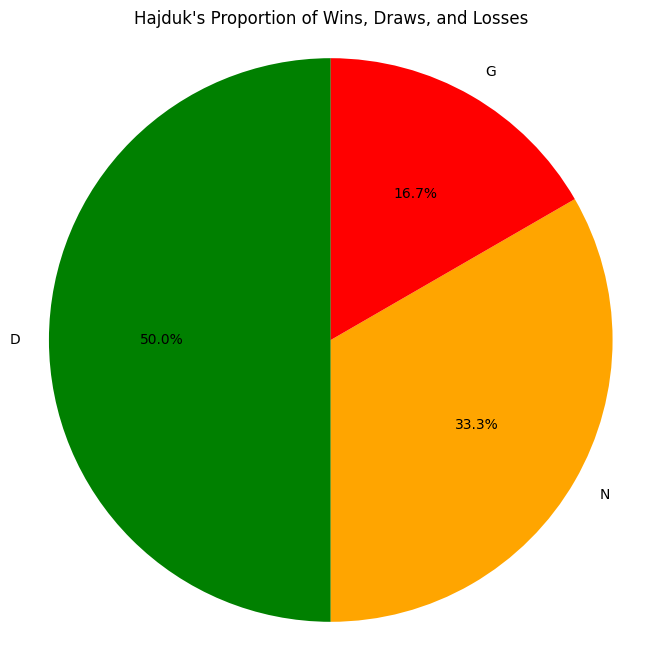

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Rezultati.csv data
df_rezultati = pd.read_csv("rezultati.csv")

# Filter rows where Hajduk is either the home or away team
hajduk_home = df_rezultati[df_rezultati['Domaćin'] == 'Hajduk']
hajduk_away = df_rezultati[df_rezultati['Gost'] == 'Hajduk']

# Concatenate the home and away matches for Hajduk
hajduk_matches = pd.concat([hajduk_home, hajduk_away])

# Count the number of wins, draws, and losses for Hajduk
hajduk_results = hajduk_matches['Pobjednik'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(hajduk_results, labels=hajduk_results.index, autopct='%1.1f%%', startangle=90, colors=['green', 'orange', 'red'])
plt.title("Hajduk's Proportion of Wins, Draws, and Losses")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Statistički prikaz žutih i crvenih kartona

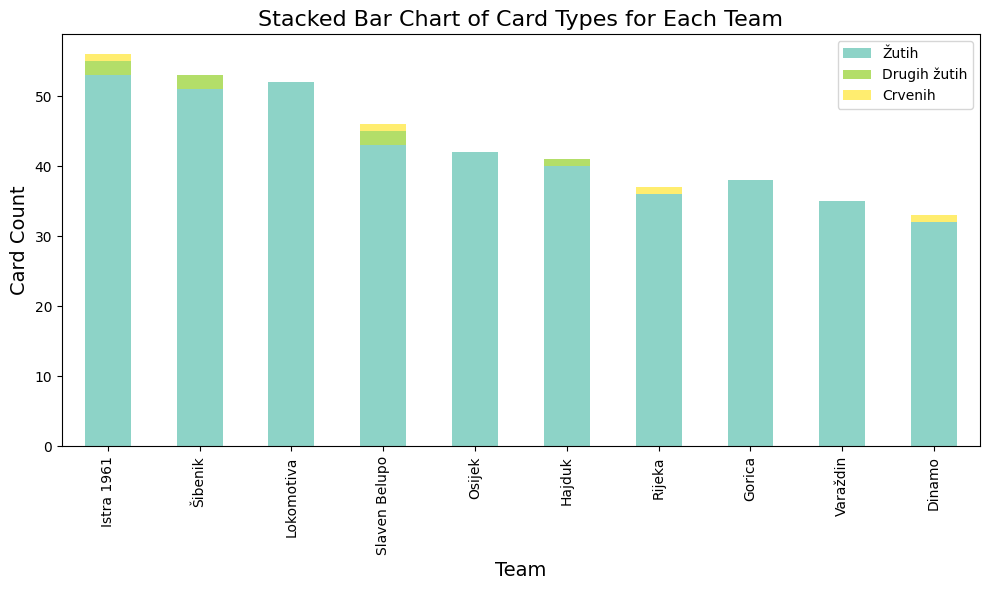

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Kartoni.csv data
df_kartoni = pd.read_csv("kartoni.csv")

# Set the team name as the index
df_kartoni.set_index('Klub', inplace=True)

# Plot stacked bar chart for the card types
df_kartoni[['Žutih', 'Drugih žutih', 'Crvenih']].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

# Title and axis labels
plt.title('Stacked Bar Chart of Card Types for Each Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Card Count', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

## Statistički prikaz liste najboljih strijelaca

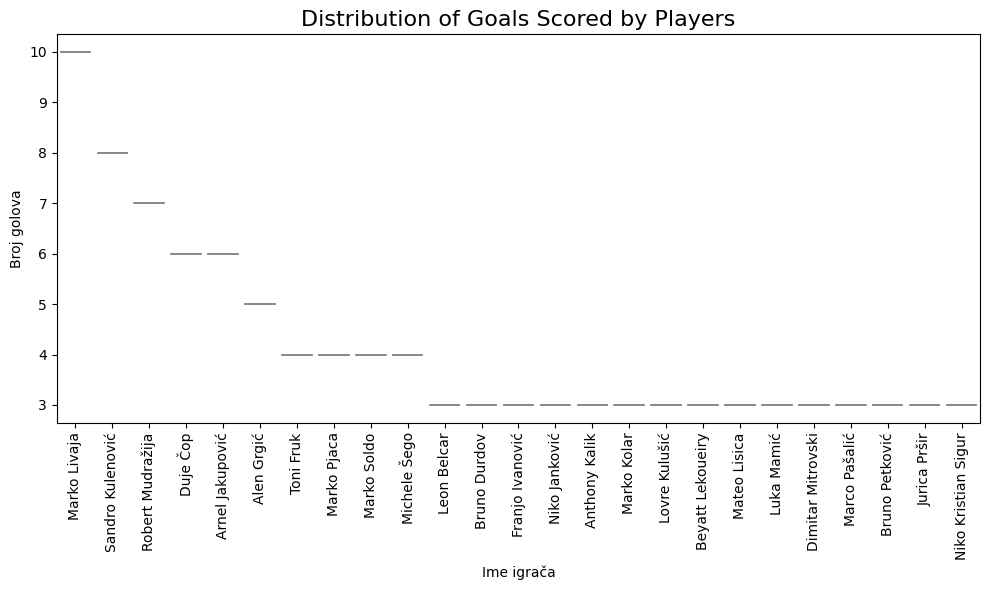

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from strijelci.csv
df_strijelci = pd.read_csv("Strijelci.csv")

# Create a violin plot for the distribution of goals scored by players
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_strijelci, x='Ime igrača', y='Broj golova', inner="quart", color="lightblue")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title
plt.title('Distribution of Goals Scored by Players', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

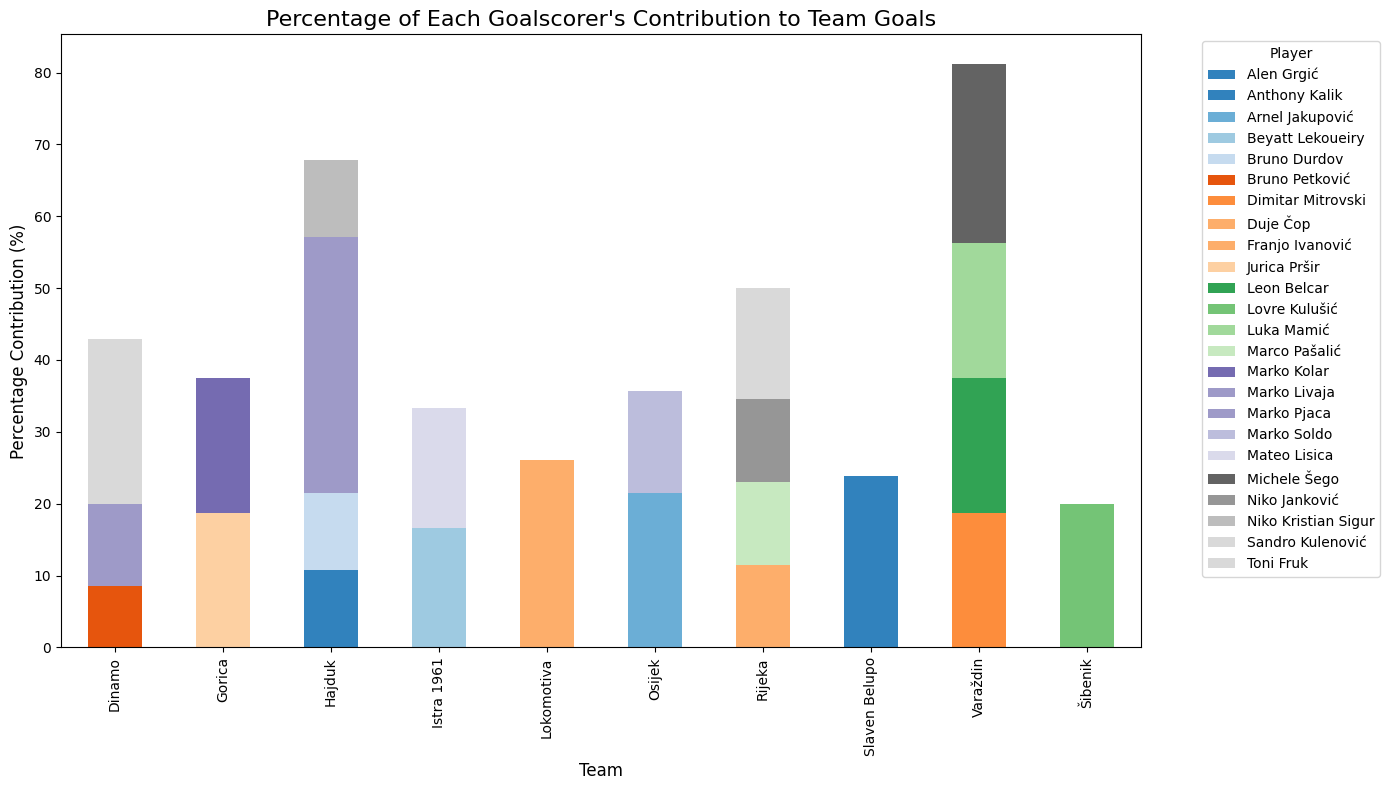

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_strijelci = pd.read_csv("strijelci.csv")
df_ljestvica = pd.read_csv("ljestvica.csv")

# Rename relevant columns in ljestvica.csv for clarity
df_ljestvica = df_ljestvica.rename(columns={"G+": "Team Goals"})

# Merge the two dataframes on 'Klub'
df = pd.merge(df_strijelci, df_ljestvica[['Klub', 'Team Goals']], on='Klub', how='inner')

# Calculate percentage contribution for each player
df['Goal Contribution (%)'] = (df['Broj golova'] / df['Team Goals']) * 100

# Pivot the data for visualization
pivot_df = df.pivot(index='Klub', columns='Ime igrača', values='Goal Contribution (%)')

# Replace NaN values with 0 and ensure numeric data
pivot_df = pivot_df.fillna(0).apply(pd.to_numeric, errors='coerce')

# Plot the stacked bar chart
plt.figure(figsize=(14, 8))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(14, 8))

# Add chart details
plt.title("Percentage of Each Goalscorer's Contribution to Team Goals", fontsize=16)
plt.ylabel("Percentage Contribution (%)", fontsize=12)
plt.xlabel("Team", fontsize=12)
plt.legend(title="Player", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()



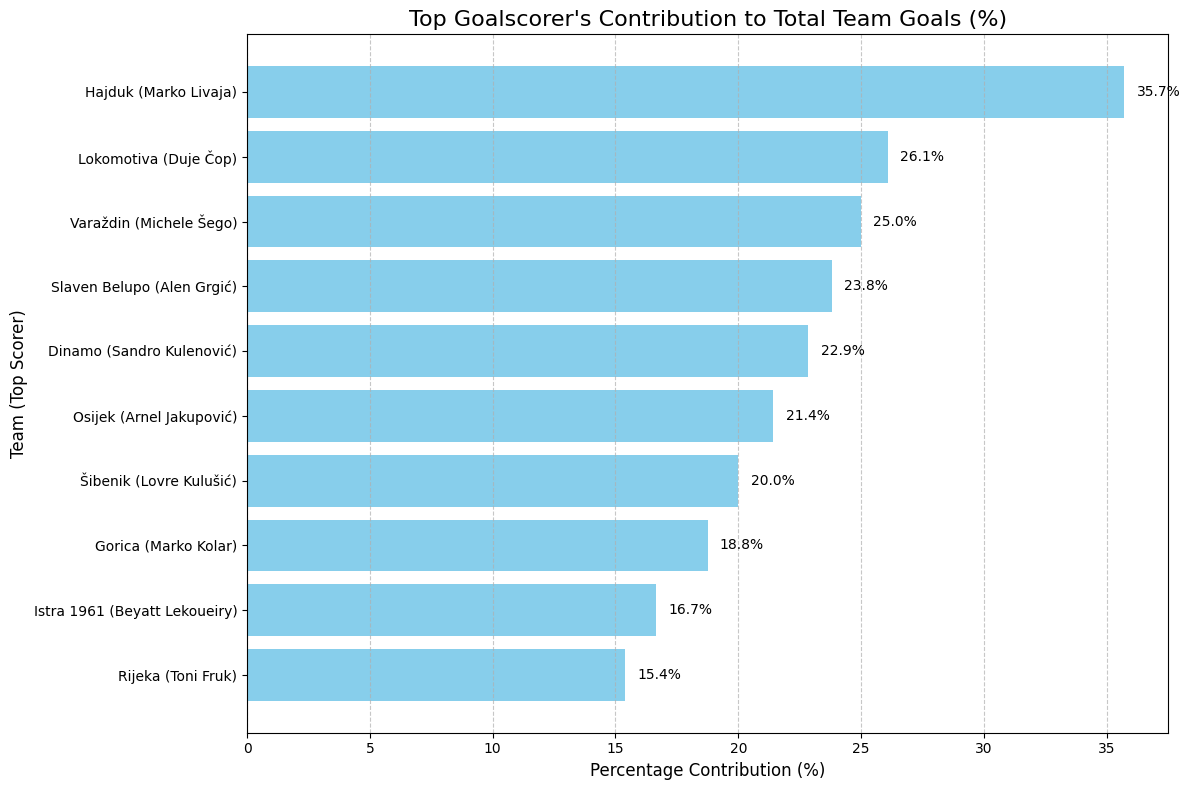

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_strijelci = pd.read_csv("strijelci.csv")
df_ljestvica = pd.read_csv("ljestvica.csv")

# Rename relevant columns in ljestvica.csv for clarity
df_ljestvica = df_ljestvica.rename(columns={"G+": "Team Goals"})

# Merge the two dataframes on 'Klub'
df = pd.merge(df_strijelci, df_ljestvica[['Klub', 'Team Goals']], on='Klub', how='inner')

# Find the top scorer for each team
top_scorers = df.loc[df.groupby('Klub')['Broj golova'].idxmax()]

# Calculate percentage contribution for the top scorer of each team
top_scorers['Top Scorer Contribution (%)'] = (top_scorers['Broj golova'] / top_scorers['Team Goals']) * 100

# Add the top scorer's name in brackets next to the team name
top_scorers['Team (Top Scorer)'] = top_scorers['Klub'] + " (" + top_scorers['Ime igrača'] + ")"

# Sort by percentage contribution
top_scorers = top_scorers.sort_values(by='Top Scorer Contribution (%)', ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_scorers['Team (Top Scorer)'], top_scorers['Top Scorer Contribution (%)'], color='skyblue')

# Add chart details
plt.title("Top Goalscorer's Contribution to Total Team Goals (%)", fontsize=16)
plt.xlabel("Percentage Contribution (%)", fontsize=12)
plt.ylabel("Team (Top Scorer)", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest contribution at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate percentages on the bars
for index, value in enumerate(top_scorers['Top Scorer Contribution (%)']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()



## Statistički prikaz broja gledatelja na stadionima

C:\Users\Tonći Radovniković\AppData\Local\Temp\ipykernel_9420\809760398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x=x_col, y=y_col, palette="viridis", legend=False)


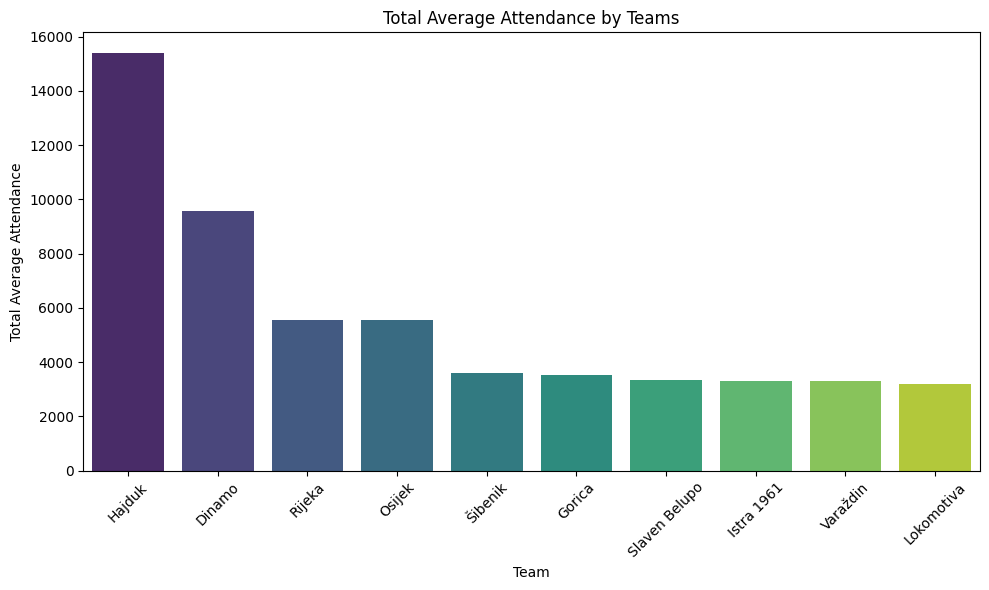

C:\Users\Tonći Radovniković\AppData\Local\Temp\ipykernel_9420\809760398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x=x_col, y=y_col, palette="viridis", legend=False)


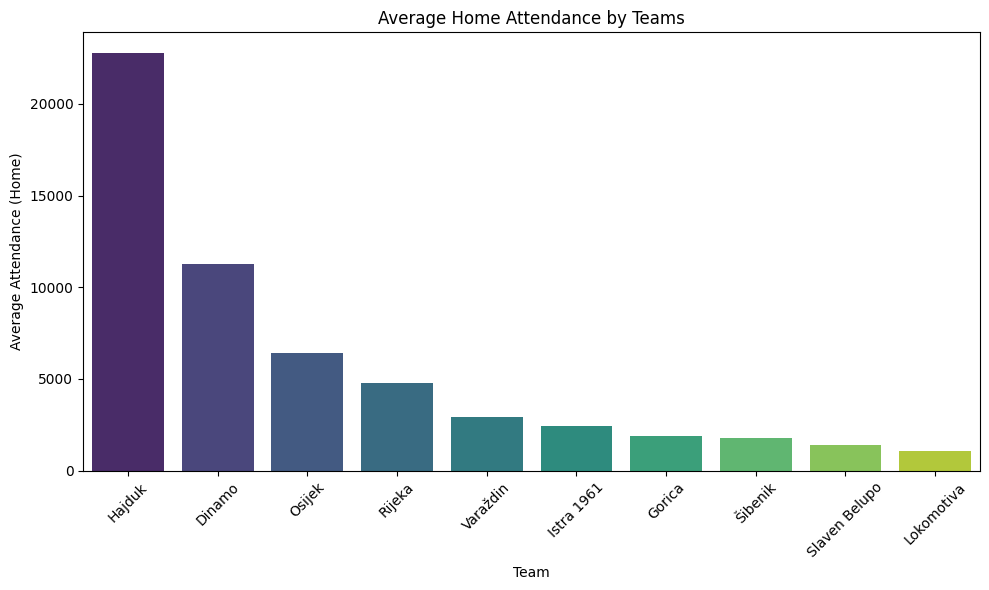

C:\Users\Tonći Radovniković\AppData\Local\Temp\ipykernel_9420\809760398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x=x_col, y=y_col, palette="viridis", legend=False)


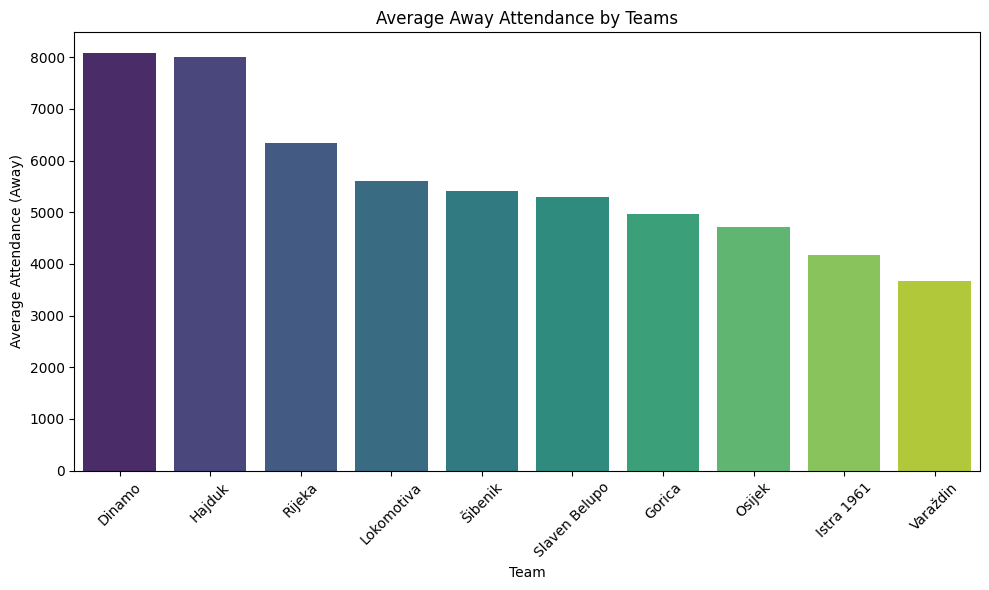

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to create sorted bar plots
def make_sorted_barplot(df, x_col, y_col, title, x_label, y_label):
    sorted_df = df.sort_values(by=y_col, ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=sorted_df, x=x_col, y=y_col, palette="viridis", legend=False)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Load the updated Gledatelji data
df_gledatelji = pd.read_csv("gledatelji.csv")

# Convert numeric columns to integers
df_gledatelji[["Kod kuće", "U gostima", "Ukupno"]] = df_gledatelji[["Kod kuće", "U gostima", "Ukupno"]].astype(int)

# Bar plot for total average attendance
make_sorted_barplot(
    df=df_gledatelji,
    x_col="Klub",
    y_col="Ukupno",
    title="Total Average Attendance by Teams",
    x_label="Team",
    y_label="Total Average Attendance"
)

# Bar plot for average home attendance
make_sorted_barplot(
    df=df_gledatelji,
    x_col="Klub",
    y_col="Kod kuće",
    title="Average Home Attendance by Teams",
    x_label="Team",
    y_label="Average Attendance (Home)"
)

# Bar plot for average away attendance
make_sorted_barplot(
    df=df_gledatelji,
    x_col="Klub",
    y_col="U gostima",
    title="Average Away Attendance by Teams",
    x_label="Team",
    y_label="Average Attendance (Away)"
)


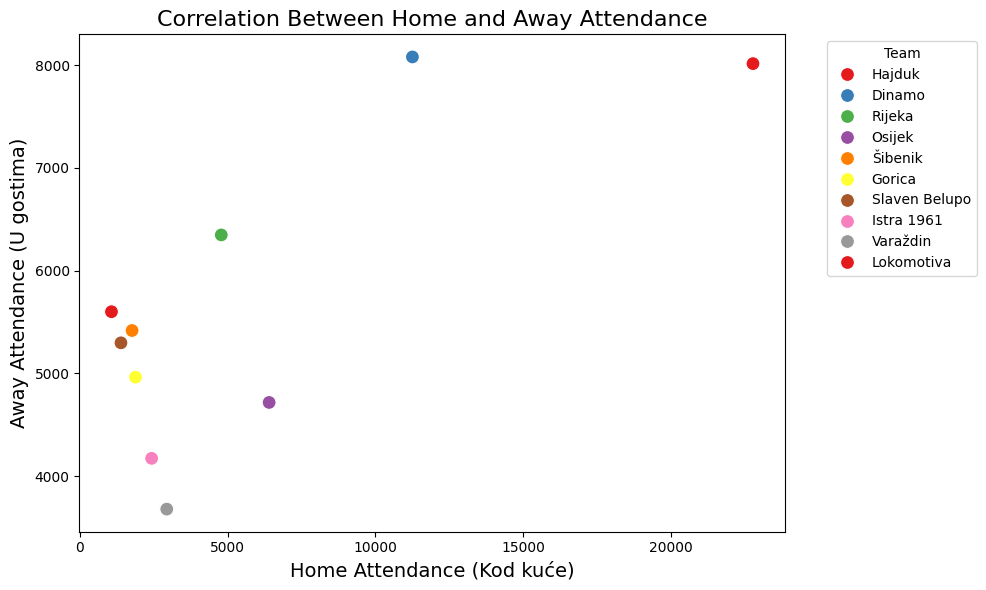

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Gledatelji.csv data
df_gledatelji = pd.read_csv("gledatelji.csv")

# Scatter plot for correlation between Home and Away Attendance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gledatelji, x='Kod kuće', y='U gostima', hue='Klub', palette='Set1', s=100)

# Title and axis labels
plt.title('Correlation Between Home and Away Attendance', fontsize=16)
plt.xlabel('Home Attendance (Kod kuće)', fontsize=14)
plt.ylabel('Away Attendance (U gostima)', fontsize=14)

# Show plot
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


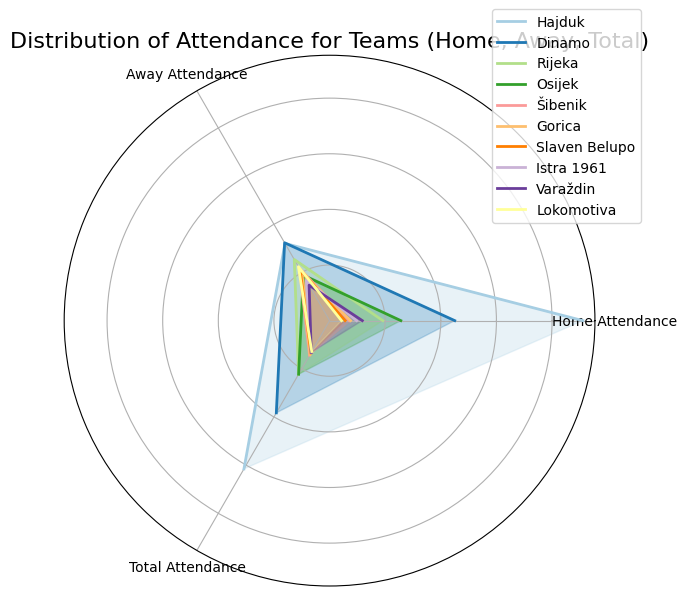

In [44]:
# Load the data from gledatelji.csv
df_gledatelji = pd.read_csv("Gledatelji.csv")

# Select the relevant columns for radar chart (Home, Away, and Total attendance)
teams = df_gledatelji['Klub']
home_attendance = df_gledatelji['Kod kuće']
away_attendance = df_gledatelji['U gostima']
total_attendance = df_gledatelji['Ukupno']

# Number of variables for the radar chart
categories = ['Home Attendance', 'Away Attendance', 'Total Attendance']
values = [home_attendance, away_attendance, total_attendance]

# Create a radar chart for each team
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Define the number of teams and the angles
num_teams = len(teams)
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

# Add the data for each team on the radar chart
for i, team in enumerate(teams):
    team_values = [home_attendance[i], away_attendance[i], total_attendance[i]]
    ax.fill(angles, team_values, color=plt.cm.Paired(i / num_teams), alpha=0.25)
    ax.plot(angles, team_values, color=plt.cm.Paired(i / num_teams), linewidth=2, label=team)

# Set the labels for the categories
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(categories)

# Add a title
ax.set_title('Distribution of Attendance for Teams (Home, Away, Total)', size=16)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Display the radar chart
plt.tight_layout()
plt.show()


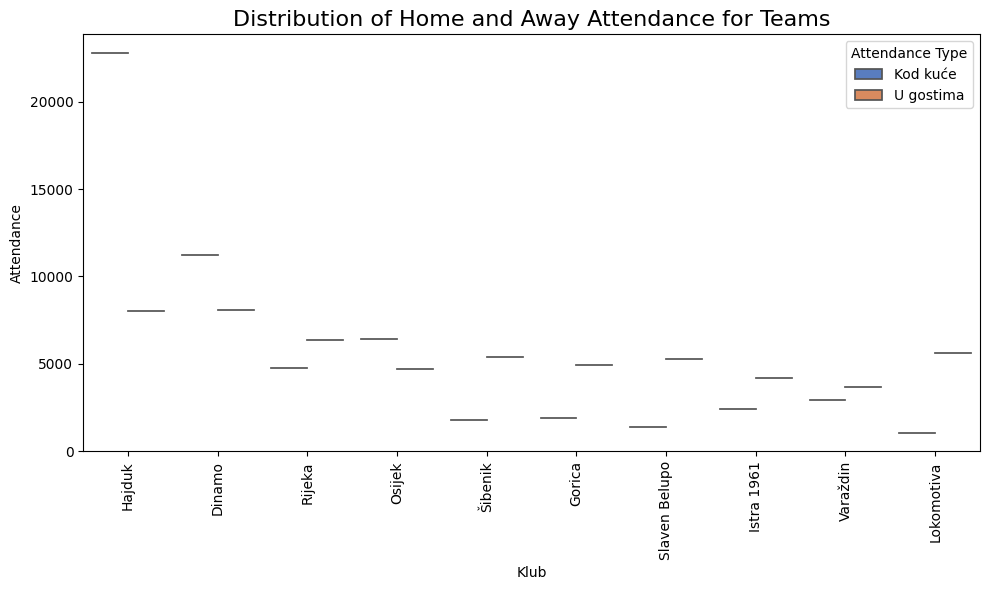

In [46]:
# Load the data from gledatelji.csv
df_gledatelji = pd.read_csv("Gledatelji.csv")

# Create a violin plot for the distribution of home and away attendance
plt.figure(figsize=(10, 6))

# Melt the dataframe to long format for Seaborn
df_gledatelji_melted = pd.melt(df_gledatelji, id_vars=['Klub'], value_vars=['Kod kuće', 'U gostima'],
                               var_name='Attendance Type', value_name='Attendance')

# Create the violin plot
sns.violinplot(data=df_gledatelji_melted, x='Klub', y='Attendance', hue='Attendance Type', split=True,
               inner="quart", palette="muted")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title
plt.title('Distribution of Home and Away Attendance for Teams', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()
